In [1]:
from lib_sections import dict_to_graph
from lib_model import LibModel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
df = pd.read_csv('data/20230413_clb_taps.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
entry_df = df.set_index('Datetime')
entry_df = entry_df[entry_df['Direction']=='Entry']['Direction'].resample('10min',  label='left').count().reset_index()
entry_df.columns = ['timestamp', 'entry_counts']
entry_df

,timestamp,entry_counts
0,2023-04-12 22:50:00+00:00,1
1,2023-04-12 23:00:00+00:00,0
2,2023-04-12 23:10:00+00:00,0
3,2023-04-12 23:20:00+00:00,3
4,2023-04-12 23:30:00+00:00,3
...,...,...
79,2023-04-13 12:00:00+00:00,13
80,2023-04-13 12:10:00+00:00,22
81,2023-04-13 12:20:00+00:00,13
82,2023-04-13 12:30:00+00:00,18


In [3]:
import json
# Opening JSON file
lib_sections_file = open('static/lib_sections.json')
lib_sections = json.load(lib_sections_file)
sections_attrs_file = open('static/sections_attrs.json')
sections_attrs = json.load(sections_attrs_file)
connections_file = open('static/connections.json')
connections = json.load(connections_file)

In [4]:
lib_graph = dict_to_graph(lib_sections, sections_attrs, connections)
lib_graph

<AxesSubplot: xlabel='timestamp', ylabel='num_agents'>

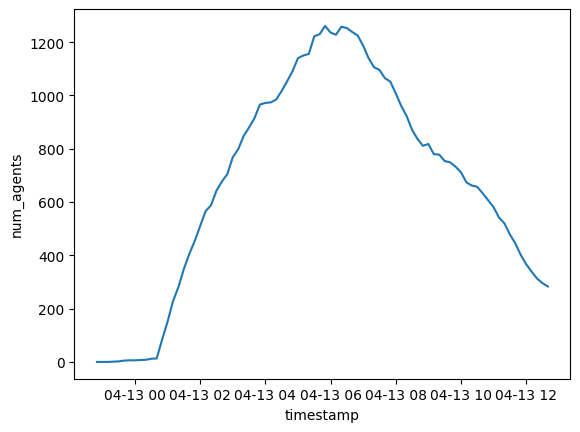

In [5]:
model = LibModel(entry_df, lib_graph)
model.run()
results = model.datacollector.get_model_vars_dataframe()
results['timestamp'] = entry_df['timestamp']
sns.lineplot(results, x='timestamp', y='num_agents')

In [6]:
results2 = model.datacollector.get_table_dataframe("SectionsData")
results2['utilization_rate'] = 1-results2['empty_seats']/results2['capacity']
results2

,timestamp,section,level,capacity,empty_seats,utilization_rate
0,2023-04-12 22:50:00+00:00,clb_3-movable_seat,clb_3,100,100,0.000
1,2023-04-12 22:50:00+00:00,clb_3-4_man_seat,clb_3,50,50,0.000
2,2023-04-12 22:50:00+00:00,clb_3-8_man_seat,clb_3,100,100,0.000
3,2023-04-12 22:50:00+00:00,clb_3-window_seat,clb_3,100,100,0.000
4,2023-04-12 22:50:00+00:00,clb_3-sofa,clb_3,100,100,0.000
...,...,...,...,...,...,...
3775,2023-04-13 12:40:00+00:00,wbs_6-sofa,wbs_6,100,96,0.040
3776,2023-04-13 12:40:00+00:00,wbs_6-soft_seat,wbs_6,100,97,0.030
3777,2023-04-13 12:40:00+00:00,wbs_6-cubicle,wbs_6,40,4,0.900
3778,2023-04-13 12:40:00+00:00,wbs_6-discussion_cubicle,wbs_6,40,38,0.050


In [7]:
results2['section'].unique()

array(['clb_3-movable_seat', 'clb_3-4_man_seat', 'clb_3-8_man_seat',
       'clb_3-window_seat', 'clb_3-sofa', 'clb_3-soft_seat',
       'clb_3-cubicle', 'clb_3-discussion_cubicle', 'clb_3-diagonal_seat',
       'clb_4-movable_seat', 'clb_4-4_man_seat', 'clb_4-8_man_seat',
       'clb_4-window_seat', 'clb_4-sofa', 'clb_4-soft_seat',
       'clb_4-cubicle', 'clb_4-discussion_cubicle', 'clb_4-diagonal_seat',
       'clb_5-movable_seat', 'clb_5-4_man_seat', 'clb_5-8_man_seat',
       'clb_5-window_seat', 'clb_5-sofa', 'clb_5-soft_seat',
       'clb_5-cubicle', 'clb_5-discussion_cubicle', 'clb_5-diagonal_seat',
       'clb_6-movable_seat', 'clb_6-4_man_seat', 'clb_6-8_man_seat',
       'clb_6-window_seat', 'clb_6-sofa', 'clb_6-soft_seat',
       'clb_6-cubicle', 'clb_6-discussion_cubicle', 'clb_6-diagonal_seat',
       'wbs_6-movable_seat', 'wbs_6-4_man_seat', 'wbs_6-8_man_seat',
       'wbs_6-window_seat', 'wbs_6-sofa', 'wbs_6-soft_seat',
       'wbs_6-cubicle', 'wbs_6-discussion_cubicle'

<AxesSubplot: xlabel='timestamp', ylabel='utilization_rate'>

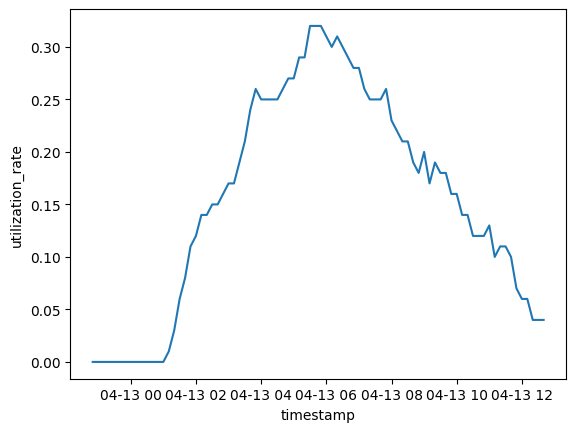

In [8]:
sns.lineplot(results2[results2['section']=='wbs_6-sofa'], x='timestamp', y='utilization_rate')

In [9]:
agents = model.datacollector.get_agent_vars_dataframe()
agents

chosen_seat  satisfaction
Step AgentID                             
3    3-0      wbs_6-cubicle      4.921922
4    3-0      wbs_6-cubicle      4.921922
     4-0      wbs_6-cubicle      4.910237
5    3-0      wbs_6-cubicle      4.921922
     4-0      wbs_6-cubicle      4.910237
...                     ...           ...
83   83-4     wbs_6-cubicle      4.494986
     83-5     wbs_6-cubicle      4.012009
     83-6     clb_6-cubicle      3.824229
     83-7     clb_5-cubicle      4.036515
     83-8     wbs_6-cubicle      4.415595

[56746 rows x 2 columns]

In [10]:
agents['satisfaction'].describe()

count    56746.000000
mean         2.305206
std          1.100961
min          1.015457
25%          1.562396
50%          1.788332
75%          3.187827
max          4.926057
Name: satisfaction, dtype: float64

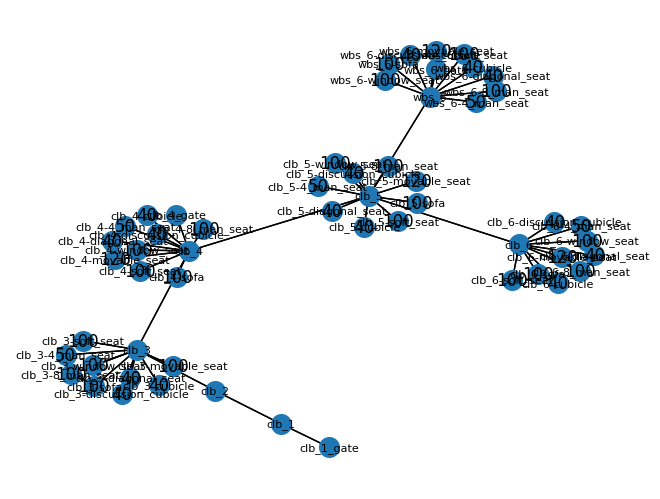

{'clb_3-movable_seat': 100,
 'clb_3-4_man_seat': 50,
 'clb_3-8_man_seat': 100,
 'clb_3-window_seat': 100,
 'clb_3-sofa': 100,
 'clb_3-soft_seat': 100,
 'clb_3-cubicle': 40,
 'clb_3-discussion_cubicle': 40,
 'clb_3-diagonal_seat': 40,
 'clb_4-movable_seat': 120,
 'clb_4-4_man_seat': 50,
 'clb_4-8_man_seat': 100,
 'clb_4-window_seat': 100,
 'clb_4-sofa': 100,
 'clb_4-soft_seat': 100,
 'clb_4-cubicle': 40,
 'clb_4-discussion_cubicle': 40,
 'clb_4-diagonal_seat': 40,
 'clb_5-movable_seat': 120,
 'clb_5-4_man_seat': 50,
 'clb_5-8_man_seat': 100,
 'clb_5-window_seat': 100,
 'clb_5-sofa': 100,
 'clb_5-soft_seat': 100,
 'clb_5-cubicle': 40,
 'clb_5-discussion_cubicle': 40,
 'clb_5-diagonal_seat': 40,
 'clb_6-movable_seat': 120,
 'clb_6-4_man_seat': 50,
 'clb_6-8_man_seat': 100,
 'clb_6-window_seat': 100,
 'clb_6-sofa': 100,
 'clb_6-soft_seat': 100,
 'clb_6-cubicle': 40,
 'clb_6-discussion_cubicle': 40,
 'clb_6-diagonal_seat': 40,
 'wbs_6-movable_seat': 120,
 'wbs_6-4_man_seat': 50,
 'wbs_6-8_m

In [11]:
# Create a layout for the nodes
pos = nx.spring_layout(model.library_graph)

# Extract capacities into a dictionary for nodes that have the 'capacity' attribute
capacities = {node: model.library_graph.nodes[node]['capacity'] for node in model.library_graph.nodes if 'capacity' in model.library_graph.nodes[node]}

# Draw the nodes with labels
nx.draw(model.library_graph, pos, with_labels=True, node_size=200, font_size=8)

# Draw the edges
nx.draw_networkx_edges(model.library_graph, pos)

# Label nodes with their capacities
nx.draw_networkx_labels(model.library_graph, pos, labels=capacities)

# Show the graph
plt.show()
capacities